# Reproducing the Friedkin Model

We use the additional Information provided under http://www.sciencemag.org/content/354/6310/321/suppl/DC1 to reproduce the Friedkin Model.

## General Preparations 

### W-Matrix:

"For Figures 2-5 we make use of a decomposition of $\boldsymbol{W}$, based on the F-J model assumption
$a_{ii} = 1 − w_{ii}$ for all i

$\boldsymbol{W} = \boldsymbol{A}\boldsymbol{R} + \boldsymbol{I} - \boldsymbol{A}$

where $\boldsymbol{R} = [r_{ij}]$ is the matrix of relative weights among the interpersonal allocations of weights
to others."

"Figures 2-5 are also based on the same realization of $\boldsymbol{R}$.
It is a sparse valued Gilbert (n, p) random graph, p = 0.011, normalized to obtain a row
stochastic matrix, that allows direct or indirect flows of influence occur from every individual i
to every individual j of the population. In other words, the employed $\boldsymbol{R}$ is one realization of a
random low density aperiodic irreducible row stochastic matrix."

#### Interpretation:

The Basic outlay of our $\boldsymbol{R}$-Matrix is simply a Matrix that has zeros in the diagonal and a small chance (p=0.011) for ones everywhere else. A Gilbert graph in this context simply means that we have n points that may or may not be connected to each other (with probability p). For large n, the chance that every point is indirectly connected to every other point approaches one.

From the normalization of $\boldsymbol{W}$: $\sum_{j=1}^n w_{ij} = 1$ follows also $\sum_{j=1}^n r_{ij} = 1$.

So after we constructed the large Matrix containing zeros and ones, we simply have to normalize the values.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Path_to_images = "Presentation_Images/"

#Increases Size of labels :P
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size' : 30}

plt.rc('font', **font)

def get_R(n: int, P: float):

    rand = np.random.choice(2, size = n*n, p=[1-P,P]) #get n*n zero-or-ones with probability P
    
    R_one = np.reshape(rand, (n,n)) #bring numbers in Matrix form
    np.fill_diagonal(R_one, 0)#set diagonal values to zero
    
    Normalization_Vector = np.sum(R_one, axis = 1) #Vector that has the sum over j 
    
    Normalization_Vector[Normalization_Vector == 0] = 1
    #Because of the way that normalization is set up, it might be possible that a row only contains zeros, in which case we set
    #the value to 1 to avoid a divide by zero error. For our case, a row of zeros is no problem at all, except if there is 
    #also an empthy column along with it. That would mean an individual not connected to the influence network.
    #But that is extremely unlikely.
    
    R = np.zeros((n,n))
    
    for i in range(n):
        R[:,i] = R_one[:,i]/Normalization_Vector[:] #Divide in every row by the sum of that row
    
    return R
    

In [2]:
def get_W(R: np.ndarray, A: np.ndarray):
    
    N = len(R[0,:]) #dimension of Matrices
    W = A @ R + np.identity(N) - A
    
    return W

###  Initial X Matrix:

"Figures 2-5 are based on the same realization of the initial certainty of beliefs of n individuals on $m = 3$ statements $\boldsymbol{X}(0)$. The matrix of initial beliefs $\boldsymbol{X}(0)$ contains heterogeneous
certainties of belief on each statement with mean values 0.90, 0.50, and 0.10, for statements
1-3, respectively. To generate it, we draw three sets of $n = 1, 000$ real values $\boldsymbol{x_i}$ from the normal (Gaussian) distribution $N(µ_i, 1), µ_i = ln(π_i/(1 − π_i))$, where $π_1 = 0.90$, $π_2 = 0.50$, and
$π_3 = 0.10$ respectively for the three statements. For each statement $i = 1, 2, 3$ with the mean
$µ_i$ and variance 1, the $i$th column of $\boldsymbol{X}(0)$ is then a distribution of the corresponding certainties
of beliefs $\frac{exp(\boldsymbol{x}_i)}{1 + exp(\boldsymbol{x}_i)}$."

#### Interpretation:

We create a probability density that has values between 0 and 1 with a maximum at $\pi_i$. If you do the probability transformation you find the closed form of the probability density

$\rho(x) = \frac{1}{\sqrt{2\pi}} \cdot \frac{1}{x \cdot (1-x)} \cdot exp(-\frac{1}{2}(ln(\frac{x}{1-x})-ln(\frac{\pi_i}{1-\pi_i}))^2)$

We will now visualize the probability densities for $π_1 = 0.90$, $π_2 = 0.50$, and $π_3 = 0.10$ respectively.
After that we will use the described process to create the Matrix $\boldsymbol{X}(0)$.

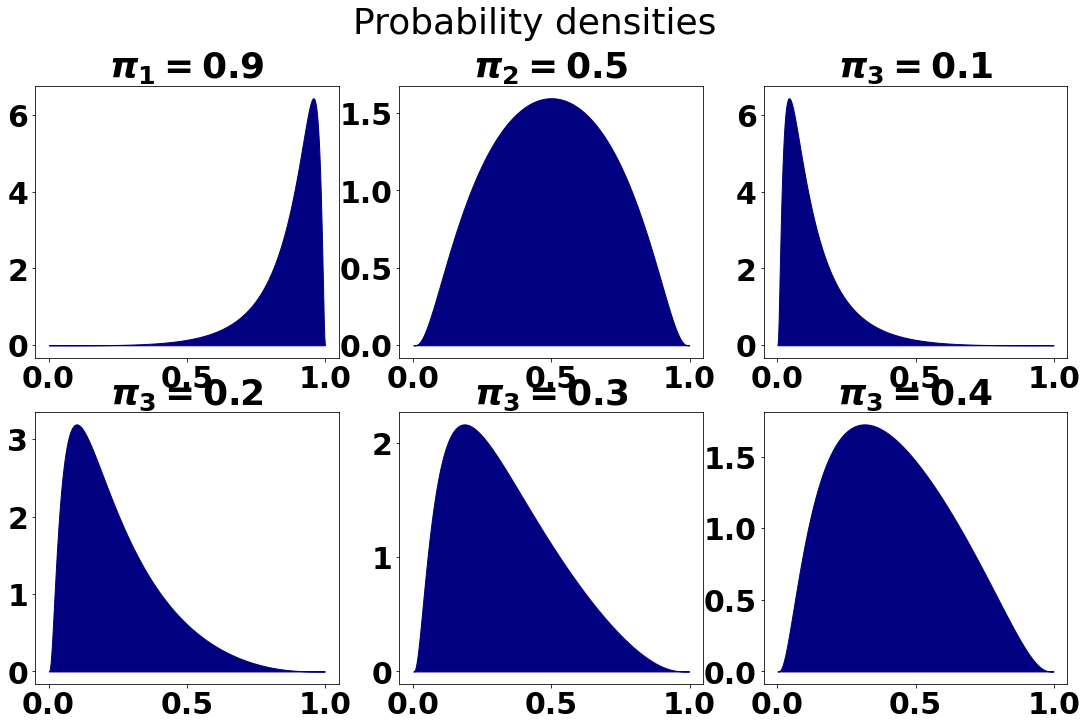

In [3]:
def rho(x, Pi):

    y = 1/np.sqrt(2*np.pi) /x /(1-x) *np.exp(-1/2 * (np.log(x/(1-x)) -np.log(Pi/(1-Pi)))**2)
    
    return y

x = np.linspace(0.001,0.999,500)
Pi1 = 0.9
Pi2 = 0.5
Pi3 = 0.1

y1 = rho(x,Pi1)
y2 = rho(x,Pi2)
y3 = rho(x,Pi3)

#To illustrate a bit more:

Pi4 = 0.2
Pi5 = 0.3
Pi6 = 0.4

y4 = rho(x,Pi4)
y5 = rho(x,Pi5)
y6 = rho(x,Pi6)



fig, axs = plt.subplots(2, 3)
fig.suptitle('Probability densities')
fig.set_size_inches(18.5, 11)

#axs[0,0].plot(x, y1, color ='navy')
axs[0,0].fill_between(x, y1, color ='navy')
axs[0,0].set_title('$\pi_1 = 0.9$')
#axs[0,0].vlines(Pi1,0,rho(Pi1,Pi1),color = 'red', linestyle = 'dashed')

#axs[0,1].plot(x, y2, color ='navy')
axs[0,1].fill_between(x, y2, color ='navy')
axs[0,1].set_title('$\pi_2 = 0.5$')

#axs[0,2].plot(x, y3, color ='navy')
axs[0,2].fill_between(x, y3, color ='navy')
axs[0,2].set_title('$\pi_3 = 0.1$')


#More Probability densities:

#axs[1,0].plot(x, y3, color ='navy')
axs[1,0].fill_between(x, y4, color ='navy')
axs[1,0].set_title('$\pi_3 = 0.2$')

#axs[1,1].plot(x, y3, color ='navy')
axs[1,1].fill_between(x, y5, color ='navy')
axs[1,1].set_title('$\pi_3 = 0.3$')

#axs[1,2].plot(x, y3, color ='navy')
axs[1,2].fill_between(x, y6, color ='navy')
axs[1,2].set_title('$\pi_3 = 0.4$')

plt.show()
#plt.savefig(Path_to_images+'ProbabilityDensities')


In [4]:
def get_X0(n, pi_array):
    
    Number_Of_Statements = len(pi_array) #The number of statements equals the number of entrys in the pi_array
    
    Cov_Matrix = np.identity(Number_Of_Statements) #Create Sigma=1 covariance matrix (no correlation between different entries)
    
    mu_array = np.log(pi_array/(1-pi_array))
    
    
    Gaussian_Distribution = np.random.multivariate_normal(mu_array, Cov_Matrix, n) #creates n times 
    
    X_0 = np.exp(Gaussian_Distribution)/(1+np.exp(Gaussian_Distribution)) #shape [n,Number_Of_Statements]
    #print(X_0.shape)
    return X_0

    

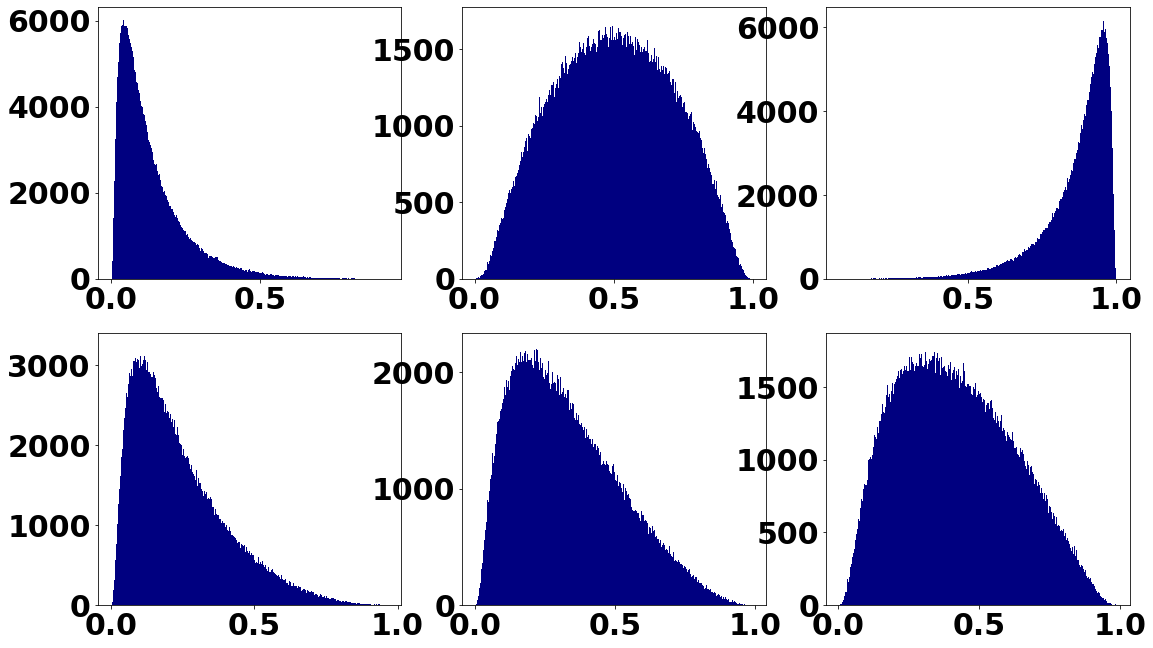

In [5]:
#Proof that we found the correct distribution

n=1000000
pi_array = np.array([0.1,0.5,0.9,0.2,0.3,0.4])

X_zero = get_X0(n,pi_array)


fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18.5, 11)

axs[0][0].hist(X_zero[:,0], bins=1000, color = 'navy')
axs[0][1].hist(X_zero[:,1], bins=1000, color = 'navy')
axs[0][2].hist(X_zero[:,2], bins=1000, color = 'navy')
axs[1][0].hist(X_zero[:,3], bins=1000, color = 'navy')
axs[1][1].hist(X_zero[:,4], bins=1000, color = 'navy')
axs[1][2].hist(X_zero[:,5], bins=1000, color = 'navy')

plt.show()
#plt.savefig(Path_to_images+'ProbabilityDensities_Histogram')

### Implement Matrix Iterations

Now all we have to do is to implement the updating of the $\boldsymbol{X}$-Matrix using 

$\boldsymbol{X}(k+1) = \boldsymbol{A}\boldsymbol{W}\boldsymbol{X}(k)\boldsymbol{C}^T + (\boldsymbol{I} - \boldsymbol{A})\boldsymbol{X}(0)$, for $k = 0,1,2,...$

In [6]:
def get_X_kPlusOne(A: np.ndarray, 
                   W: np.ndarray, 
                   Xk: np.ndarray, 
                   X0: np.ndarray, 
                   C: np.ndarray) -> np.ndarray:
    
    Length = len(A[0,:])
    C_Transposed = np.transpose(C)
    X_kPlusOne = A @ W @ Xk @ C_Transposed + (np.identity(Length) - A) @ X0
    
    return X_kPlusOne

#Now we need a function that repeatedly uses the function we just defined

def X_after_time(A: np.ndarray, 
                 W: np.ndarray, 
                 Xk: np.ndarray, 
                 X0: np.ndarray, 
                 C: np.ndarray,
                 T: int) -> np.ndarray:
    
    
    X_list = []
    #Initially Xk = X0
    
    for t in range(T):
        X_list.append(Xk)
        
        X_new = get_X_kPlusOne(A, W, Xk, X0, C)
        
        Xk = X_new
    
        
    #in the end X_list is a List containing T arrays with shape [n,m] 
    return X_list
        
    

### Implement the visualization

It appears that Friedkin et al. simply plot all values in the Matrix $\boldsymbol{X}(T)$ over T for every time step. For $n=1000$ and $NumberOfStatements = 3$ that would be 3000 y-values per x-value.

We simply reproduce this visualization.

In [7]:
def PlotFunction(X_List, n, T, pi_array, PlotTitle):
    
    Big_Array = np.zeros((n*len(pi_array), T)) #creates a big array [n*Number_Of_Statements, T] that can contain all the results.
    
    for t in range(T):
        Big_Array[:,t] = X_List[t].reshape(-1) #takes array from the list and reshapes it into a simple 1D array, then
        #it becomes one column in the Big Array
    
    fig, ax = plt.subplots()
    
    T_values = np.arange(T) #create array from 0 to T-1 with lengt T, used as x-Values
    
    for k in range(n*len(pi_array)):
        ax.plot(T_values, Big_Array[k,:]) #plot n*Nuber_Of_Statements*T lines
        
        
    fig.suptitle(PlotTitle)
    fig.set_size_inches(18.5, 8)
    
    #plt.savefig(Path_to_images+PlotTitle)
    plt.show()
    
    

## Reproduceing figure 2

Now that we have prepared our necerssary functions, we can reproduce figure 2 from the paper.
In the supplementary Materials, Friedkin at al. write:

"In Figure 2, $\boldsymbol{A} = \boldsymbol{I}$ and the diagonal values of $\boldsymbol{W}$ are zero $w_{ii} = 0$, which eliminates all attachments to initial opinions."

In figure 2A, the beliefs are independent, which means we have

$$
C_A = 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In figure 2B, the beliefs are strongly dependent with

$$
C_B = 
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
\end{pmatrix}
$$

In the first run, we only had $T=11$ periods (which means we change 10 times).



In [8]:
n=1000
T=11
pi_array = np.array([0.9,0.5,0.1])

CA = np.array([[1,0,0],[0,1,0],[0,0,1]])
CB = np.array([[1,0,0],[1,0,0],[1,0,0]])

A2 = np.identity(n)
R = get_R(n, 0.011)
W2 = get_W(R, A2)
X_zero = get_X0(n, pi_array)

X2A = X_after_time(A2, W2, X_zero, X_zero, CA, T)
X2B = X_after_time(A2, W2, X_zero, X_zero, CB, T)


    
    

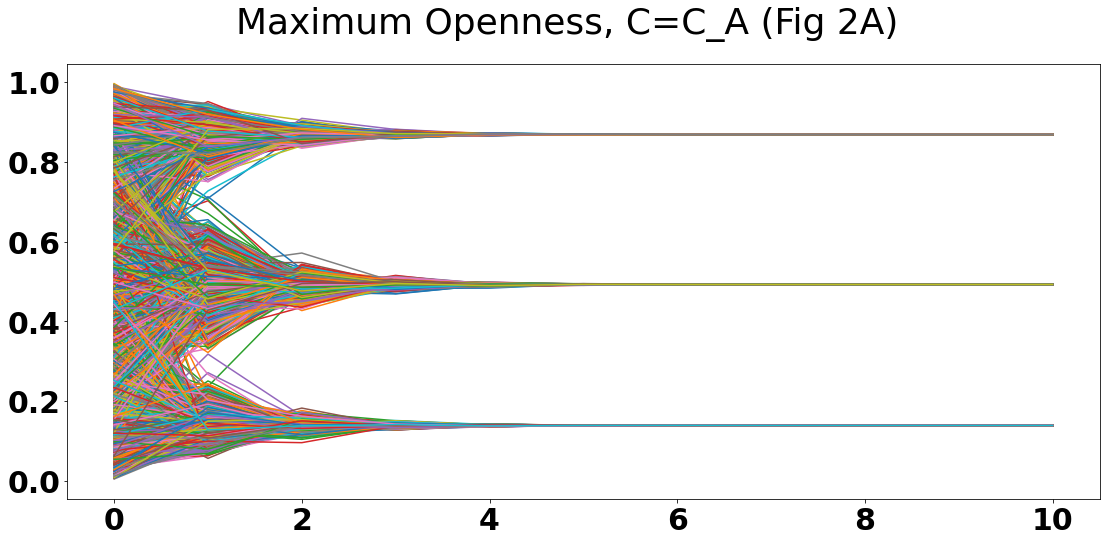

In [9]:
PlotFunction(X2A, n, T, pi_array, "Maximum Openness, C=C_A (Fig 2A)")

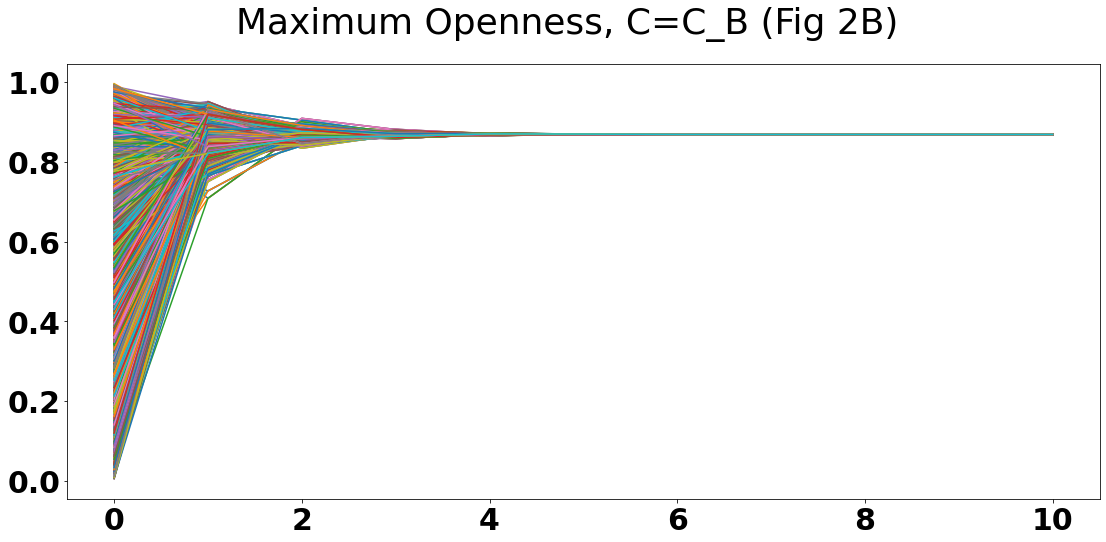

In [10]:
PlotFunction(X2B,n,T,pi_array, "Maximum Openness, C=C_B (Fig 2B)")

## Reproducing Figure 3

Figure 3 is almost the same as Figure 2, only that we now have an A-Matrix that is a little weaker:

"In Figure 3, $\boldsymbol{A} = 0.85\boldsymbol{I}$, which modestly anchors all individuals
on their initial certainties of belief."
The C-Matrices stay the same.




In [11]:
A3 = 0.85*np.identity(n)
W3 = get_W(R,A3)

X3A = X_after_time(A3, W3, X_zero, X_zero, CA, T)
X3B = X_after_time(A3, W3, X_zero, X_zero, CB, T)




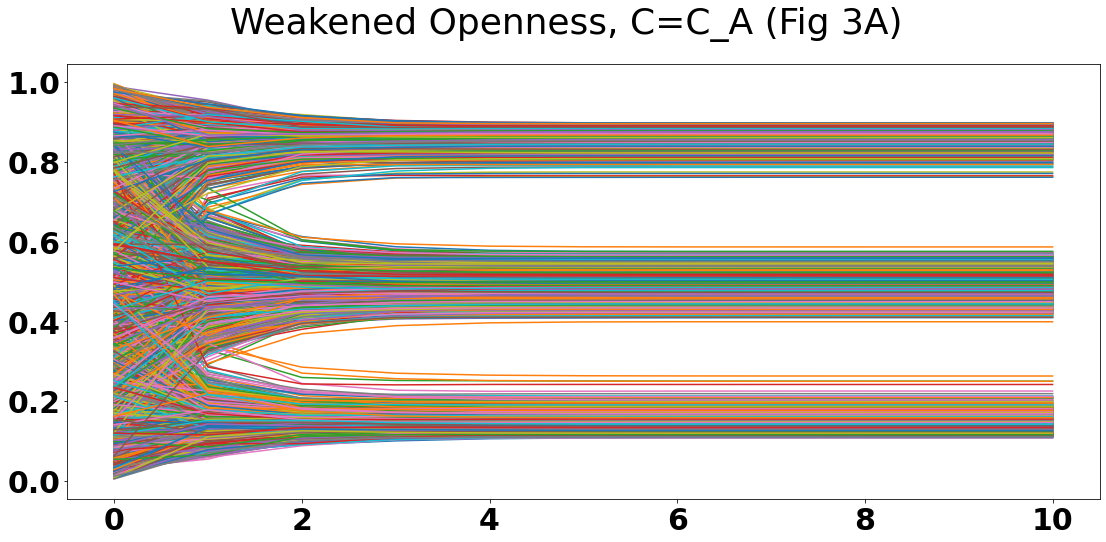

In [12]:
PlotFunction(X3A, n, T, pi_array, "Weakened Openness, C=C_A (Fig 3A)")

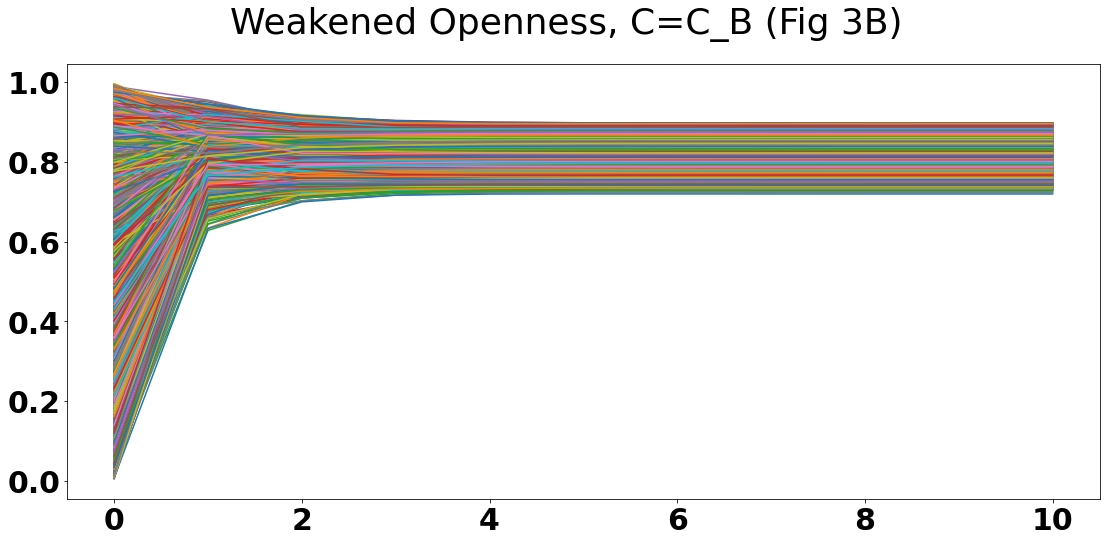

In [13]:
PlotFunction(X3B, n, T, pi_array, "Weakened Openness, C=C_B (Fig 3B)")

## Reproducing Figure 4

In the supplemenatry material, friedkin et al. describe how the produced Figure 4:

"Figure 4 begins with the setup for Figure 2 and 
(a) alters the $a_{ii}$ of an arbitrary subset of 100 individuals to $a_{ii} = 0$ (which forces their $w_{ii}$ values to $w_{ii} = 1$) and 
(b) alters each of these 100 individual’s three row values in $\boldsymbol{X}(0)$ to a uniform value of 0.10,
that is, low confidence that each statement is True. Note that in setting $w_{ii} = 1$, any positive off-diagonal i row value in R is discounted."

That means we have to prodce an $\boldsymbol{A}$-matrix where 100 diagonal entries are 0 and 900 diagonal entries are 1. We also have to alter the initial opinions in $\boldsymbol{X}(0)$ corresponding to the digaonal entries.

We use $\boldsymbol{C} = \boldsymbol{C_B}$.

Since the values are initialized randomly anyways, we can simply alter the first 100 values without introducing some bias. Also we need more Time-steps, $T_2 = 51$


In [14]:
k = 100
T2 = 51

a = np.zeros(k)
b = np.ones(n-k)
c = np.concatenate((a,b)) #One array with first k values zeros then n-k ones

A4 = np.diag(c) #Matrix with diagonal entries of c
R = get_R(n, 0.011)
W4 = get_W(R, A4)


X_zero_4 = get_X0(n, pi_array) #initialize normal X(0)

for i in range(k):
    X_zero_4[i,:] = 0.1 #change first k columns

X4B = X_after_time(A4, W4, X_zero_4, X_zero_4, CB, T2)

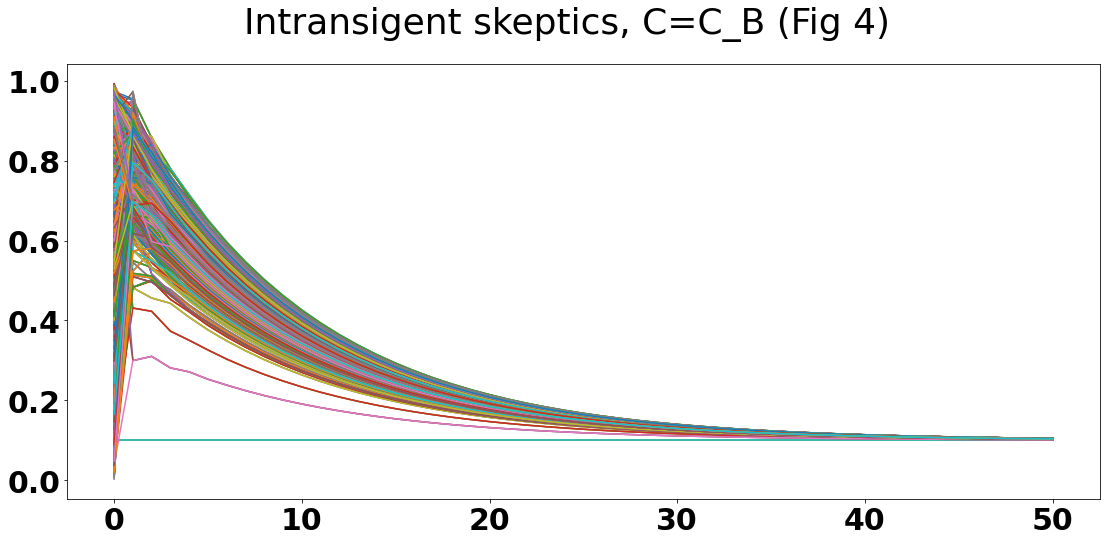

In [15]:
PlotFunction(X4B, n, T2, pi_array, "Intransigent skeptics, C=C_B (Fig 4)")

## Reproducing Figure 5

Figure 5 is basically the same setup as Figure 2, only with a new Matrix $\boldsymbol{C_C}$ that introduces a cross-pressure logic structure.
We have

$$
C_C = 
\begin{pmatrix}
1 & 0 & 0 \\
0.8 & 0 & 0.2 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [16]:
A5 = np.identity(n)
R = get_R(n, 0.011)
W5 = get_W(R, A5)
X_zero = get_X0(n, pi_array)

CC = np.array([[1,0,0],[0.8,0,0.2],[0,0,1]])

X5C = X_after_time(A5, W5, X_zero, X_zero, CC, T)

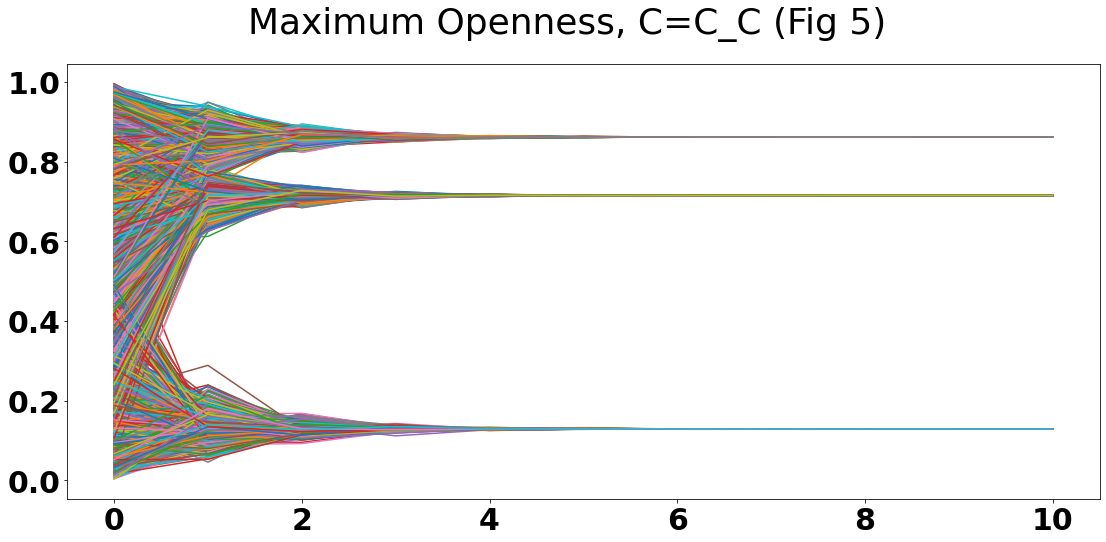

In [17]:
PlotFunction(X5C, n, T, pi_array, "Maximum Openness, C=C_C (Fig 5)")

## Reproducing Figure 6

For this figure we have to apply different $\boldsymbol{C}$-Matrices to different parts of the $\boldsymbol{X}$-Matrix. This means we have to adjust the get_X_kPlusOne function. It is best achieved by building it up from tow part functions.

In [18]:
def get_X_kPlusOne_WithoutC(A: np.ndarray, 
                   W: np.ndarray, 
                   Xk: np.ndarray, 
                   X0: np.ndarray) -> np.ndarray:
    
    Length = len(A[0,:])
    X_kPlusOne = A @ W @ Xk + (np.identity(Length) - A) @ X0
    
    return X_kPlusOne

def ApplyTwoCs(X: np.ndarray,
               C1: np.ndarray,
               C2: np.ndarray,
               cutoff: int) -> np.ndarray:
    
    #first we cut X into two parts
    
    X1 = X[:cutoff,:]
    X2 = X[cutoff:,:]
    
    #transpose C, just like before
    
    C1_transposed = np.transpose(C1)
    C2_transposed = np.transpose(C2)
    
    X1_mult = X1 @ C1_transposed
    X2_mult = X2 @ C2_transposed
    
    #bring them together to a single X
    
    X_result = np.concatenate((X1_mult,X2_mult), axis=0)
    
    return X_result

#Do it for many time steps

def X_after_time_TwoCs(A: np.ndarray, 
                       W: np.ndarray, 
                       Xk: np.ndarray, 
                       X0: np.ndarray, 
                       C1: np.ndarray,
                       C2: np.ndarray,
                       cutoff: int,
                       T: int) -> np.ndarray:
    
    
    X_list = []
    #Initially Xk = X0
    
    for t in range(T):
        X_list.append(Xk)
        
        X_newC = ApplyTwoCs(Xk, C1, C2, cutoff)
        X_new = get_X_kPlusOne_WithoutC(A, W, X_newC, X0)
        
        Xk = X_new
        
    #in the end X_list is a List containing T arrays with shape [n,m] 
    return X_list
        
#We also need a small adjustment to the plot function, since we don't have the pi_array
def PlotFunctionTwoC(X_List, n, T, NumberOfStatements, PlotTitle):
    
    Big_Array = np.zeros((n*NumberOfStatements, T)) #creates a big array [n*NumberOfStatements, T] that can contain all the results.
    
    for t in range(T):
        Big_Array[:,t] = X_List[t].reshape(-1) #takes array from the list and reshapes it into a simple 1D array, then
        #it becomes one column in the Big Array
    
    fig, ax = plt.subplots()
    
    T_values = np.arange(T) #create array from 0 to T-1 with lengt T, used as x-Values
    
    for k in range(n*NumberOfStatements):
        ax.plot(T_values, Big_Array[k,:]) #plot n*NuberOfStatements*T lines
        
        
    fig.suptitle(PlotTitle)
    fig.set_size_inches(18.5, 8)
    
    #plt.savefig(Path_to_images+PlotTitle)
    plt.show()
    
    
    

Now we have to initialize $\boldsymbol{X}(0)$, $\boldsymbol{W}$, $\boldsymbol{A}$, $\boldsymbol{C_1} = \boldsymbol{C_B}$ and $\boldsymbol{C_2} = \boldsymbol{C_A}$ as they are given in the main paper. We have to do this manually. Then we can use the previously defined functions to produce figure 6.

In [19]:
X_zero_6 = np.array([[0.96,0.56,0.16],[0.94,0.54,0.14],[0.92,0.52,0.12],[0.88,0.48,0.08],[0.86,0.46,0.06],[0.84,0.44,0.04]])
#print(X_zero_6)
W6 = np.array([[0,0.8,0.2,0,0,0],[0.5,0,0.5,0,0,0],[0.2,0.8,0,0,0,0],[0,0.8,0,0,0.1,0.1],[0,0.8,0,0.1,0,0.1],[0,0.8,0,0.1,0.1,0]])
#print(W_6)
A6 = np.identity(6) #everyone is maximally open to influence


C1 = np.array([[1,0,0],[1,0,0],[1,0,0]])
C2 = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [20]:
cutoff = 2 #first three people 0,1,2
nNew = 6
NumberOfStatements6 = 3
T3 = 4 #only 3 iterations

X6 = X_after_time_TwoCs(A6, W6, X_zero_6, X_zero_6, C1, C2, cutoff, T3)


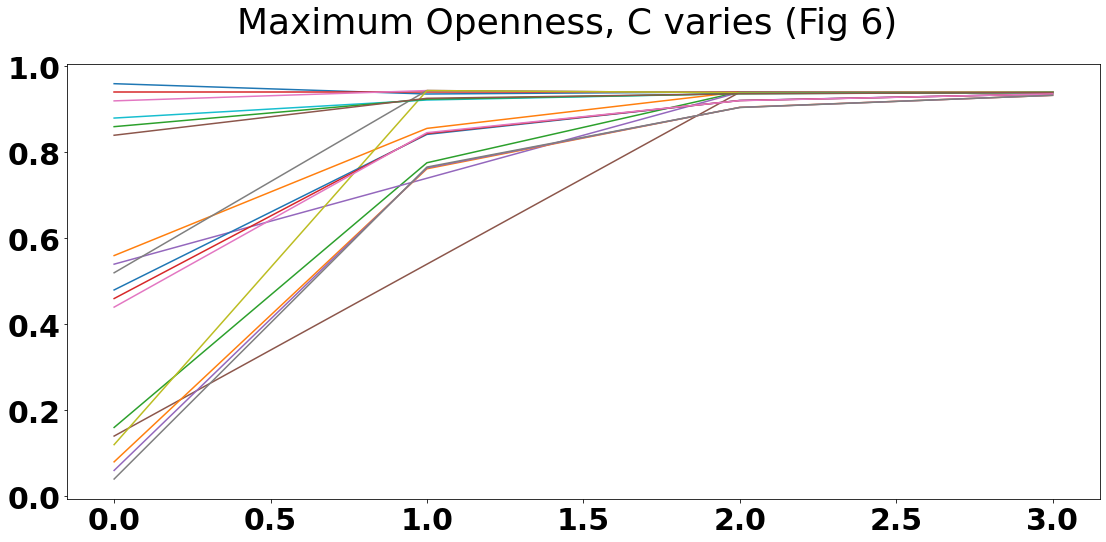

In [21]:
PlotFunctionTwoC(X6, nNew , T3, NumberOfStatements6, "Maximum Openness, C varies (Fig 6)")


Note that this result only occurs this fast if the highly influential individual (See column two in the Weight Matrix) operates under Logic System $\boldsymbol{C_B}$. If the highly influential individual operates under Logic System $\boldsymbol{C_A}$, the convergence takes longer. But since the highly influential individual is still maximally open to influence, in the long run, the same result occurs.

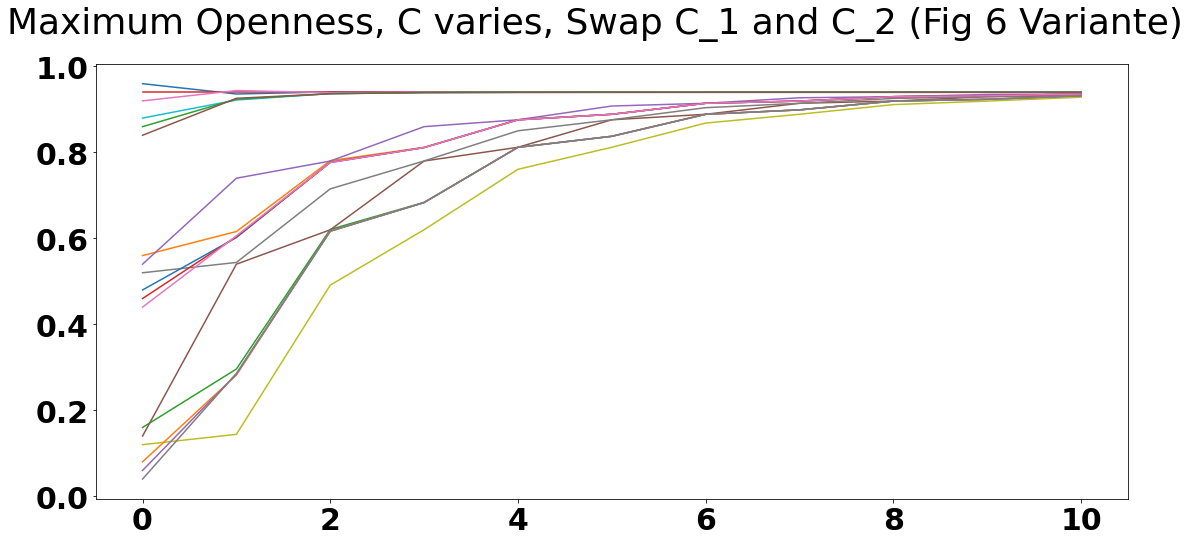

In [22]:
T = 11

X6Var = X_after_time_TwoCs(A6, W6, X_zero_6, X_zero_6, C2, C1, cutoff, T) #swap C1 and C2

PlotFunctionTwoC(X6Var, nNew , T, NumberOfStatements6, "Maximum Openness, C varies, Swap C_1 and C_2 (Fig 6 Variante)")


# Model Modifications

After reproducing the models, we can try various changes to the model

## Changing C as a function of time

We will now try to see what happens if we change which $\boldsymbol{C}$-Matrix is used as a function of time. Using only $\boldsymbol{C_A}$ and $\boldsymbol{C_B}$, we would expect that using $\boldsymbol{C_B}$ only once, either at the beginning or the end produces the same result, given maximum openness.

In [23]:
def X_after_time_OnlyFirst(A: np.ndarray, 
                           W: np.ndarray, 
                           Xk: np.ndarray, 
                           X0: np.ndarray, 
                           C1: np.ndarray,
                           C2: np.ndarray,
                           T: int) -> np.ndarray:
    
    
    X_list = []
    #Initially Xk = X0
    
    X_list.append(Xk)
    X_new = get_X_kPlusOne(A, W, Xk, X0, C1)
    Xk = X_new
    
    #applies C1 for the first time, then applies T-1 times C2
    
    for t in range(T-1):
        X_list.append(Xk)
        
        X_new = get_X_kPlusOne(A, W, Xk, X0, C2)
        
        Xk = X_new
        
    #in the end X_list is a List containing T arrays with shape [n,m] 
    return X_list
        

def X_after_time_OnlyLast(A: np.ndarray, 
                          W: np.ndarray, 
                          Xk: np.ndarray, 
                          X0: np.ndarray, 
                          C1: np.ndarray,
                          C2: np.ndarray,
                          T: int) -> np.ndarray:
    
    
    X_list = []
    #Initially Xk = X0
    
    for t in range(T-1):
        X_list.append(Xk)
        
        X_new = get_X_kPlusOne(A, W, Xk, X0, C2)
        
        Xk = X_new
    
    X_new = get_X_kPlusOne(A, W, X_list[T-2], X0, C1)
    
    Xk = X_new
    
    X_list.append(Xk)
    
    
    
        
    #in the end X_list is a List containing T arrays with shape [n,m] 
    return X_list
        
    

In [24]:
n = 1000
TChange = 11
pi_array = np.array([0.9,0.5,0.1])

CA = np.array([[1,0,0],[0,1,0],[0,0,1]])
CB = np.array([[1,0,0],[1,0,0],[1,0,0]])


AChange = np.identity(n)
R = get_R(n, 0.011)
WChange = get_W(R, AChange)
X_zero_Change = get_X0(n, pi_array)

XChange1 = X_after_time_OnlyFirst(AChange, WChange, X_zero_Change, X_zero_Change, CB, CA, TChange)
XChange2 = X_after_time_OnlyLast(AChange, WChange, X_zero_Change, X_zero_Change, CB, CA, TChange)

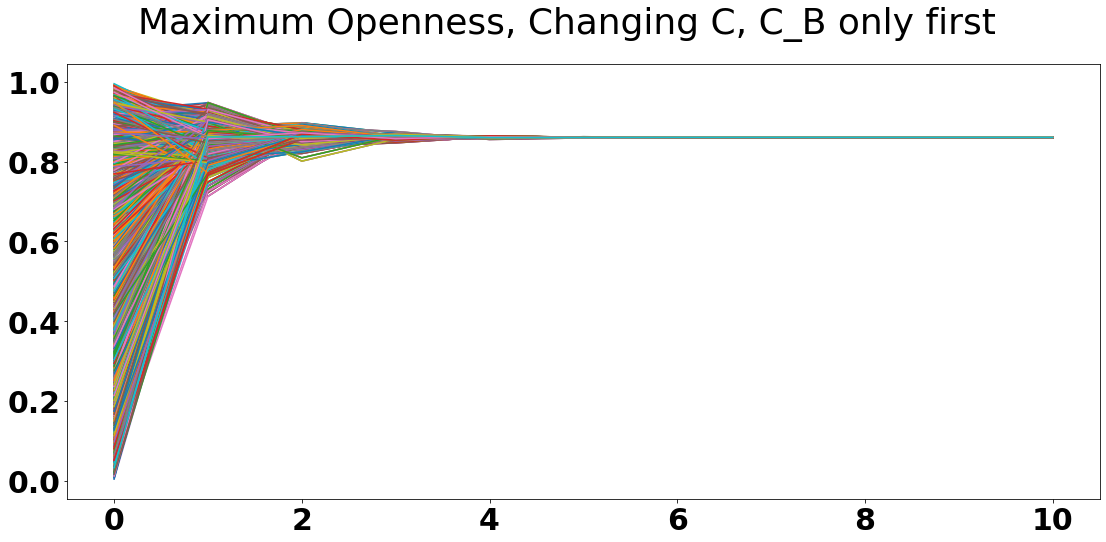

In [25]:
PlotFunction(XChange1, n, TChange, pi_array, "Maximum Openness, Changing C, C_B only first")

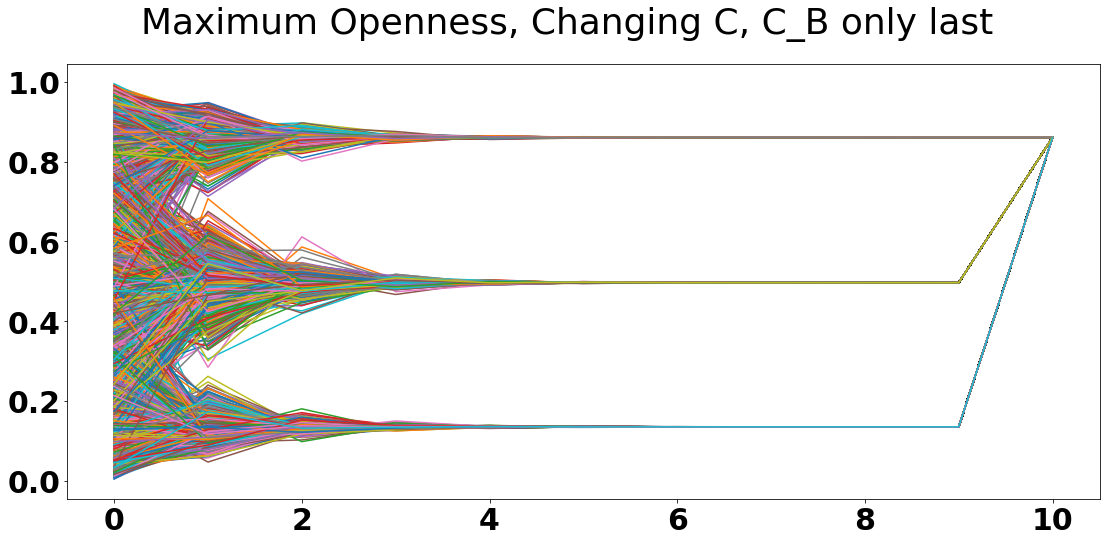

In [26]:
PlotFunction(XChange2, n, TChange, pi_array, "Maximum Openness, Changing C, C_B only last")

As we can see, for maximum openness, it doesn't matter whether we use $\boldsymbol{C_B}$ only once, or every time. The reason for this is that $\boldsymbol{C_B}$ simply replaces the values of opinion 2 and 3 with the values of opinion 1, and doing that once is enough. We now try to see what happens with limited openness:

In [27]:
n = 1000
TChangeLim = 11
pi_array = np.array([0.9,0.5,0.1])

CA = np.array([[1,0,0],[0,1,0],[0,0,1]])
CB = np.array([[1,0,0],[1,0,0],[1,0,0]])


AChangeLim = 0.85*np.identity(n)
R = get_R(n, 0.011)
WChangeLim = get_W(R, AChangeLim)
X_zero_ChangeLim = get_X0(n, pi_array)

XChange1Lim = X_after_time_OnlyFirst(AChangeLim, WChangeLim, X_zero_ChangeLim, X_zero_ChangeLim, CB, CA, TChangeLim)
XChange2Lim = X_after_time_OnlyLast(AChangeLim, WChangeLim, X_zero_ChangeLim, X_zero_ChangeLim, CB, CA, TChangeLim)

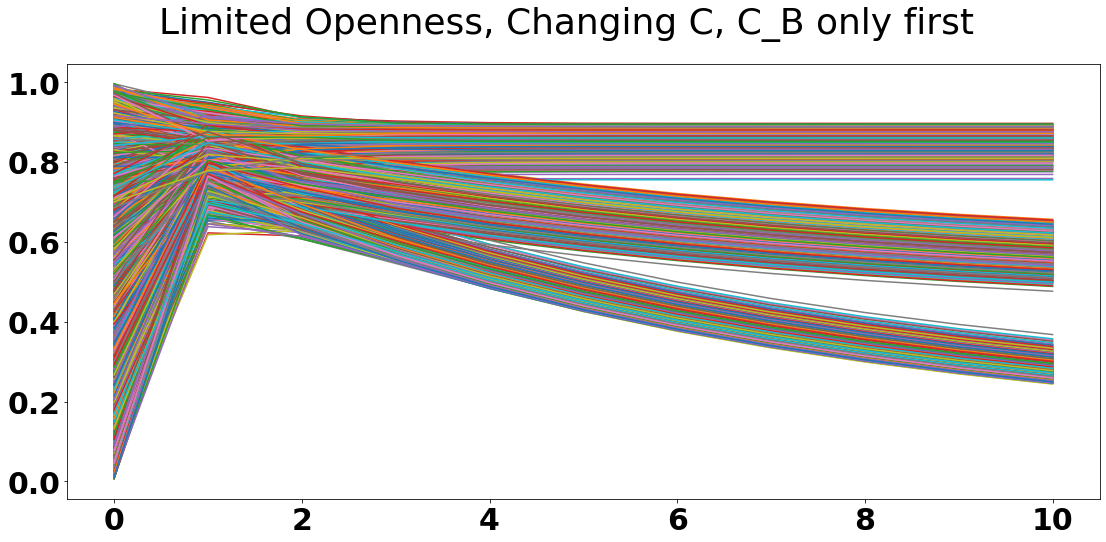

In [28]:
PlotFunction(XChange1Lim, n, TChangeLim, pi_array, "Limited Openness, Changing C, C_B only first")

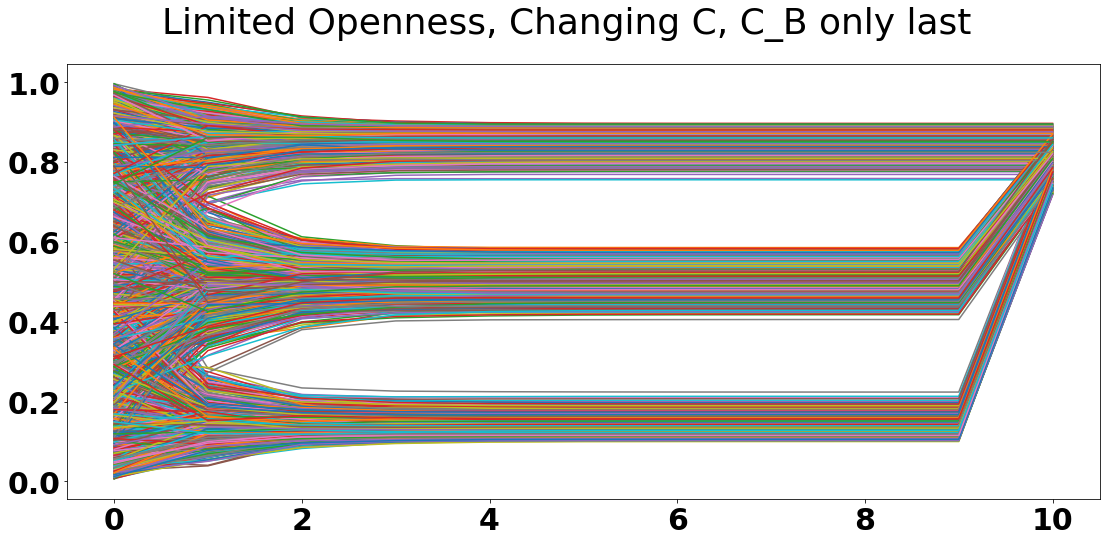

In [29]:
PlotFunction(XChange2Lim, n, TChangeLim, pi_array, "Limited Openness, Changing C, C_B only last")

Using $\boldsymbol{C_B}$ first leads to opinion divergence because people "remember" their old positions once the logic stucture doesn't apply anymore. Using $\boldsymbol{C_B}$ last, leads basically to the same outcome as using it continuous, because people don't have time to "remember".

## Weakening logical constraints

The logical constraints for Figure 2 are very strong. Using the $\boldsymbol{C_B}$-Matrix basically replaces every persons opinion on Issues 2 and 3 with their opinion on issue 1. This seems like too strong a change. We now try using the setup for figure 2, but use 

$$
C_D = 
\begin{pmatrix}
1 & 0 & 0 \\
0.1 & 0.9 & 0 \\
0.1 & 0 & 0.9 \\
\end{pmatrix}
$$

instead. This only slightly adjusts peoples opinion on issues 2 and 3 given their opinion on issue 1.

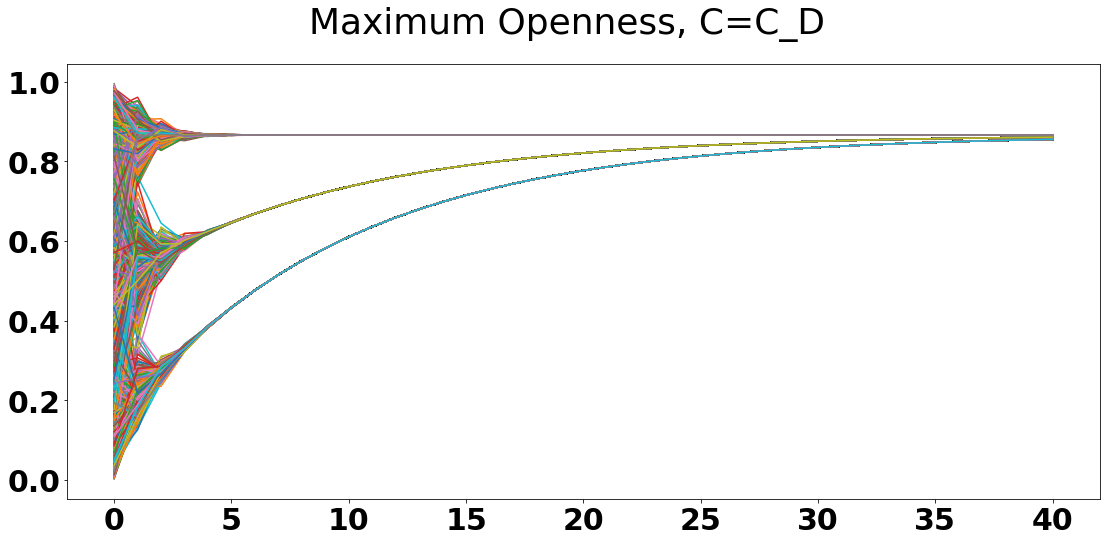

In [30]:
n=1000
TWeak=41
pi_array = np.array([0.9,0.5,0.1])


CD = np.array([[1,0,0],[0.1,0.9,0],[0.1,0,0.9]])

AWeak = np.identity(n)
R = get_R(n, 0.011)
WWeak = get_W(R, AWeak)
X_zero_Weak = get_X0(n, pi_array)

XWeak = X_after_time(AWeak, WWeak, X_zero_Weak, X_zero_Weak, CD, TWeak)

PlotFunction(XWeak, n, TWeak, pi_array, "Maximum Openness, C=C_D")

As we can see, the convergence of opinions on the separate issues through social influence are now much faster than the convergence of the opinions on all issues through the logic structure. They are effectively decoupled. Viewed through this lense, the convergence of opinion on all issues can't really be seen as an emergent phenomenon, because it just follows directly from the repeated matrix multiplication and not from agent interactions.

We now try the same for weakened openness, as an analogue to figure 3.

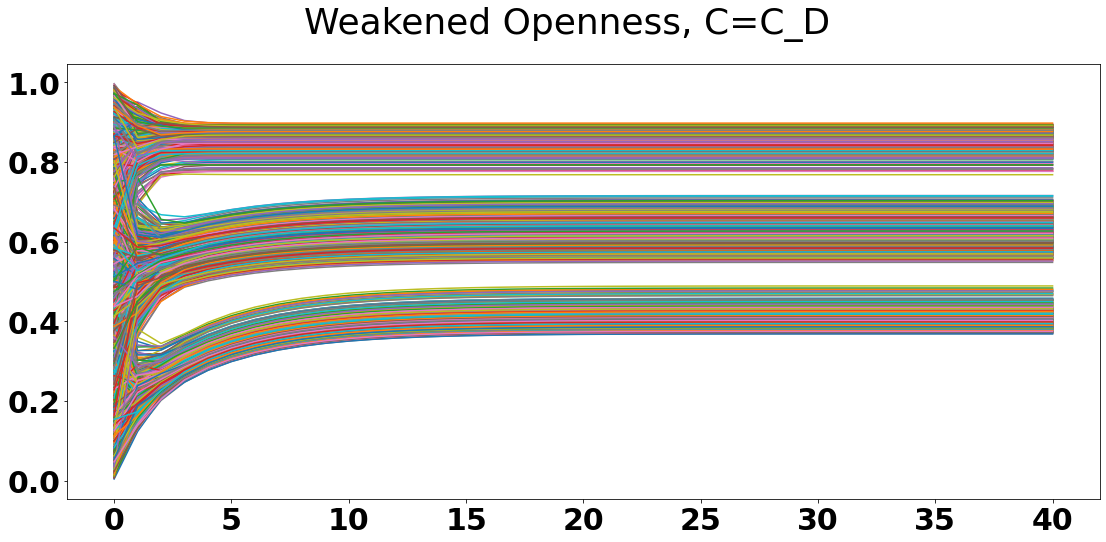

In [31]:
AWeakLessOpen = 0.85*np.identity(n)
R = get_R(n, 0.011)
WWeakLessOpen = get_W(R, AWeakLessOpen)
X_zero_Weak_LessOpen = get_X0(n, pi_array)

XWeak = X_after_time(AWeakLessOpen, WWeakLessOpen, X_zero_Weak_LessOpen, X_zero_Weak_LessOpen, CD, TWeak)

PlotFunction(XWeak, n, TWeak, pi_array, "Weakened Openness, C=C_D")

We see that the opinions don't converge at all. The reason is that people being resistant to their opinion being changed in this model includes them being resistant to both forms of influence - social and logical.

## Test for Inverse

To show that we can find an analytic solution, we have to show that $\boldsymbol{AW}$ is invertible

In [32]:
n = 1000
R = get_R(n, 0.011)

AOpen = np.identity(n)
AStubborn = 0.85*np.identity(n)

WOpen = get_W(R, AOpen)
WStubborn = get_W(R, AStubborn)

InverseOpen = np.linalg.inv(AOpen @ WOpen)
InverseStubborn = np.linalg.inv(AStubborn @ WStubborn)

print(InverseOpen @ AOpen @ WOpen)
print(InverseStubborn @ AStubborn @WStubborn)

[[ 1.00000000e+00  1.64649603e-13  2.97976410e-13 ...  1.96509475e-13
   1.04430353e-13 -3.75255382e-14]
 [-6.43929354e-15  1.00000000e+00 -3.01835505e-13 ... -5.41788836e-14
  -2.47801779e-13  2.61735078e-14]
 [-6.16173779e-15 -1.37233990e-13  1.00000000e+00 ... -4.24105195e-14
  -8.36553049e-14  4.22994972e-14]
 ...
 [-6.04377659e-15  9.78931553e-15  1.16096059e-14 ...  1.00000000e+00
   7.07767178e-15  5.55111512e-16]
 [ 7.97972799e-15 -1.14394608e-14 -1.03826456e-14 ... -9.32587341e-15
   1.00000000e+00 -2.22044605e-15]
 [-2.27318164e-14  9.84645485e-15  1.63592681e-14 ...  2.33146835e-15
  -7.38298311e-15  1.00000000e+00]]
[[ 1.00000000e+00 -1.55156104e-14  4.43532738e-15 ... -1.11022302e-16
   1.33226763e-15 -4.99600361e-16]
 [ 2.83698930e-14  1.00000000e+00  1.47748953e-14 ...  3.52495810e-14
  -3.10862447e-15 -3.88578059e-14]
 [ 4.01598690e-15  1.57218801e-15  1.00000000e+00 ... -1.38083989e-14
  -4.77395901e-15  1.92068583e-14]
 ...
 [ 1.16047214e-15 -1.04251737e-14 -3.3370132

Seems to work, at least the code isn't crying and the multiplication looks good. The non-diagonal values aren't exactly zero because we calculated the inverse numerically. If you compare it to the inverse of CB, which is not invertible, you get an error message.

In [33]:
CB = np.array([[1,0,0],[1,0,0],[1,0,0]])
CBInverse = np.linalg.inv(CB)

LinAlgError: Singular matrix